In [1]:
#pip install Pyforest 
#code for installing required libraries in environment

In [2]:
#pip install -U klib
import klib #Using Klib fot EDA Purpose

In [3]:
df=pd.read_csv("health care diabetes.csv") #importing the data

<IPython.core.display.Javascript object>

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
klib.missingval_plot(df) # returns a figure containing information about missing values

No missing values found in the dataset.


In [6]:
df.info() #info before cleaning the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df=klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

Long column names detected (>25 characters). Consider renaming the following columns ['diabetes_pedigree_function'].
Shape of cleaned data: (768, 9)Remaining NAs: 0

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 0.04 MB (-80.0%)



In [8]:
df.describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992609,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884162,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.299999,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.599998,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.099998,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='age', ylabel='Density'>

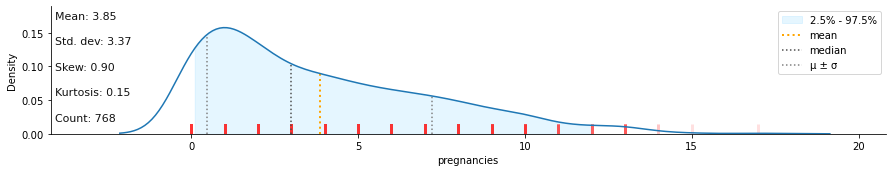

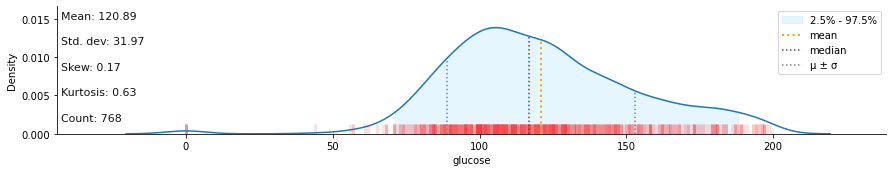

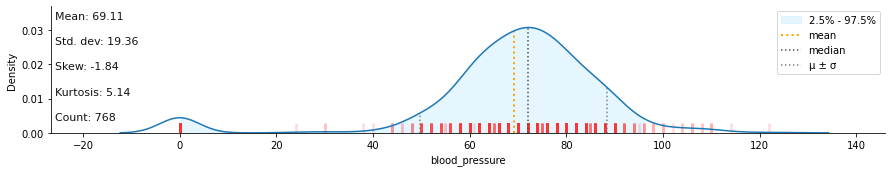

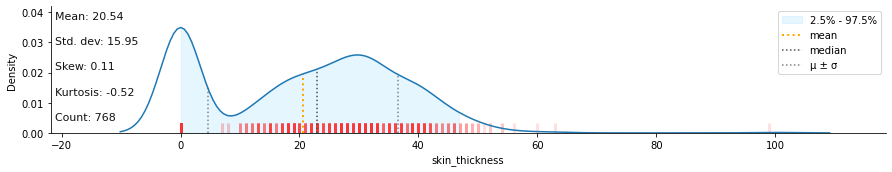

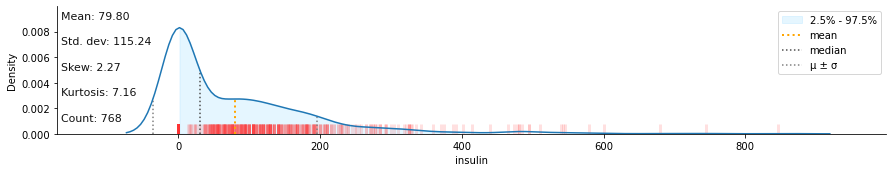

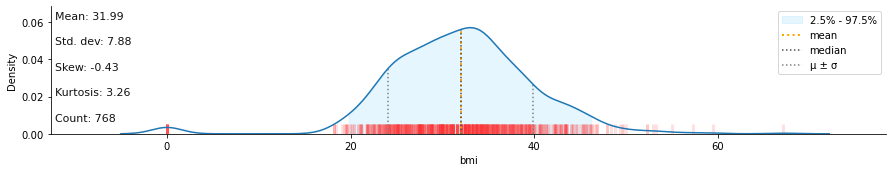

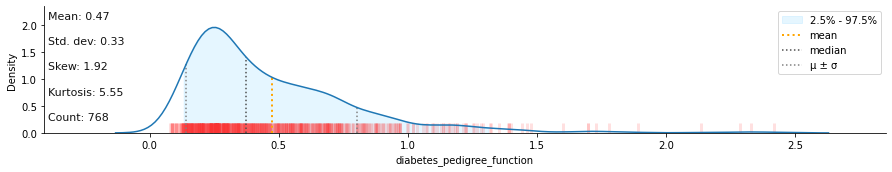

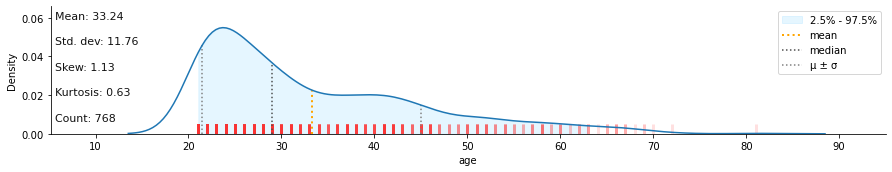

In [9]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

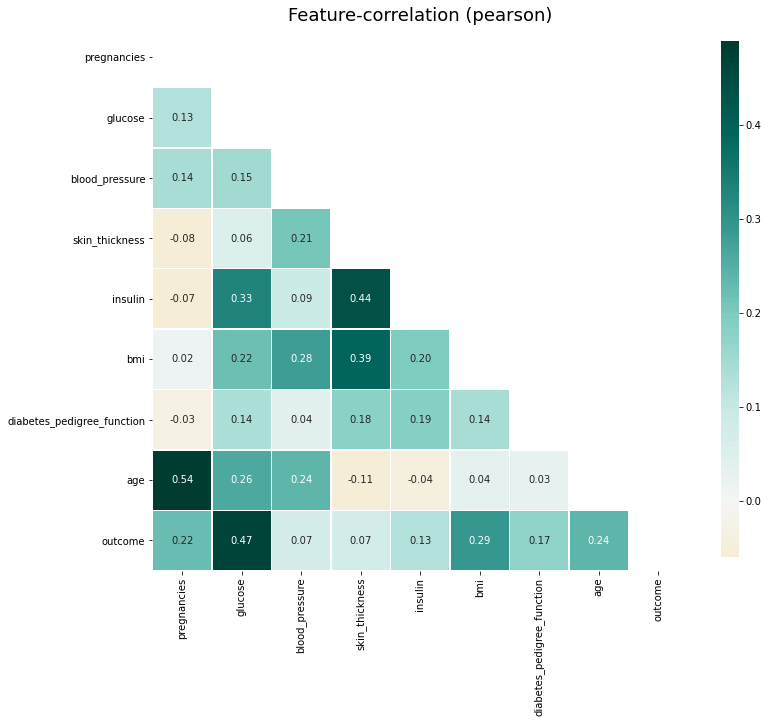

In [10]:
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations

## Project Task: Week 1 
### Data Exploration:

1. Perform descriptive analysis. Understand the variables and their corresponding values. On the columns below, a value of zero does not make sense and thus indicates missing value:

• Glucose

• BloodPressure

• SkinThickness

• Insulin

• BMI

2. Visually explore these variables using histograms. Treat the missing values accordingly.

3. There are integer and float data type variables in this dataset. Create a count (frequency) plot describing the data types and the count of variables. 

In [11]:
df[(df.glucose == 0)]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
75,1,0,48,20,0,24.700001,0.140,22,0
182,1,0,74,20,23,27.700001,0.299,21,0
342,1,0,68,35,0,32.000000,0.389,22,0
349,5,0,80,32,0,41.000000,0.346,37,1
502,6,0,68,41,0,39.000000,0.727,41,1


In [12]:
df.glucose.median()

117.0

In [13]:
df['glucose'].where(~(df.glucose == 0), other=df.glucose.median(), inplace=True) #replacing zeros with median for glucose

In [14]:
df[(df.blood_pressure == 0)].head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
7,10,115,0,0,0,35.299999,0.134,29,0
15,7,100,0,0,0,30.000000,0.484,32,1
49,7,105,0,0,0,0.000000,0.305,24,0
60,2,84,0,0,0,0.000000,0.304,21,0
78,0,131,0,0,0,43.200001,0.270,26,1


In [15]:
df[(df.blood_pressure < 45)].head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
4,0,137,40,35,168,43.099998,2.288,33,1
7,10,115,0,0,0,35.299999,0.134,29,0
15,7,100,0,0,0,30.000000,0.484,32,1
18,1,103,30,38,83,43.299999,0.183,33,0
49,7,105,0,0,0,0.000000,0.305,24,0


In [16]:
df.blood_pressure.median()

72.0

In [17]:
df['blood_pressure'].where(~(df.blood_pressure < 45), other=df.blood_pressure.median(), inplace=True) #replacing zeros with median for blood_pressure

In [18]:
df[(df.skin_thickness == 0)].describe()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
count,227.000000,227.000000,227.000000,227.0,227.0,227.000000,227.000000,227.000000,227.000000
mean,4.638767,123.449339,74.585903,0.0,0.0,30.129940,0.393291,37.251101,0.387665
std,3.350062,29.572931,11.421737,0.0,0.0,9.168249,0.276871,13.062933,0.488294
min,0.000000,44.000000,48.000000,0.0,0.0,0.000000,0.078000,21.000000,0.000000
25%,2.000000,105.000000,68.000000,0.0,0.0,25.150001,0.203000,27.000000,0.000000
50%,4.000000,120.000000,72.000000,0.0,0.0,30.400000,0.282000,34.000000,0.000000
75%,7.000000,140.500000,80.000000,0.0,0.0,35.049999,0.536500,45.000000,1.000000
max,13.000000,197.000000,122.000000,0.0,0.0,52.900002,1.781000,72.000000,1.000000


In [19]:
df.skin_thickness.median()

23.0

In [20]:
df['skin_thickness'].where(~(df.skin_thickness == 0 ), other=df.skin_thickness.median(), inplace=True) #replacing zeros with median for skin_thickness

In [21]:
df[(df.insulin == 0)]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.599998,0.627,50,1
1,1,85,66,29,0,26.600000,0.351,31,0
2,8,183,64,23,0,23.299999,0.672,32,1
5,5,116,74,23,0,25.600000,0.201,30,0
7,10,115,72,23,0,35.299999,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.000000,0.403,43,1
762,9,89,62,23,0,22.500000,0.142,33,0
764,2,122,70,27,0,36.799999,0.340,27,0
766,1,126,60,23,0,30.100000,0.349,47,1


In [22]:
df[(df.insulin < 3)]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.599998,0.627,50,1
1,1,85,66,29,0,26.600000,0.351,31,0
2,8,183,64,23,0,23.299999,0.672,32,1
5,5,116,74,23,0,25.600000,0.201,30,0
7,10,115,72,23,0,35.299999,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.000000,0.403,43,1
762,9,89,62,23,0,22.500000,0.142,33,0
764,2,122,70,27,0,36.799999,0.340,27,0
766,1,126,60,23,0,30.100000,0.349,47,1


In [23]:
df.insulin.median()

30.5

In [24]:
df['insulin'].where(~(df.insulin == 0), other=df.insulin.median(), inplace=True) #replacing zeros with median for insulin

In [25]:
df[(df.bmi == 0)]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
9,8,125,96,23,30.5,0.0,0.232,54,1
49,7,105,72,23,30.5,0.0,0.305,24,0
60,2,84,72,23,30.5,0.0,0.304,21,0
81,2,74,72,23,30.5,0.0,0.102,22,0
145,0,102,75,23,30.5,0.0,0.572,21,0
371,0,118,64,23,89.0,0.0,1.731,21,0
426,0,94,72,23,30.5,0.0,0.256,25,0
494,3,80,72,23,30.5,0.0,0.174,22,0
522,6,114,72,23,30.5,0.0,0.189,26,0
684,5,136,82,23,30.5,0.0,0.640,69,0


In [26]:
df[(df.bmi < 18)]

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
9,8,125,96,23,30.5,0.0,0.232,54,1
49,7,105,72,23,30.5,0.0,0.305,24,0
60,2,84,72,23,30.5,0.0,0.304,21,0
81,2,74,72,23,30.5,0.0,0.102,22,0
145,0,102,75,23,30.5,0.0,0.572,21,0
371,0,118,64,23,89.0,0.0,1.731,21,0
426,0,94,72,23,30.5,0.0,0.256,25,0
494,3,80,72,23,30.5,0.0,0.174,22,0
522,6,114,72,23,30.5,0.0,0.189,26,0
684,5,136,82,23,30.5,0.0,0.640,69,0


In [27]:
df.bmi.median()

32.0

In [28]:
df['bmi'].where(~(df.bmi == 0), other=df.bmi.median(), inplace=True) #replacing zeros with median for bmi

<AxesSubplot:xlabel='age', ylabel='Density'>

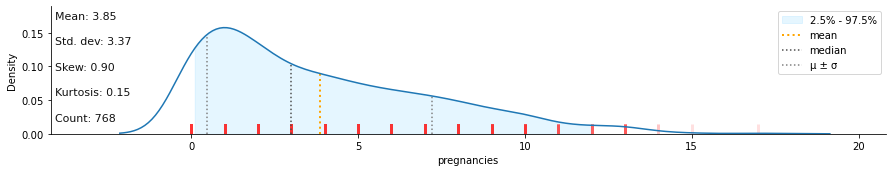

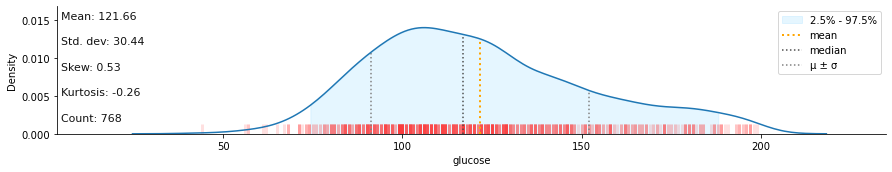

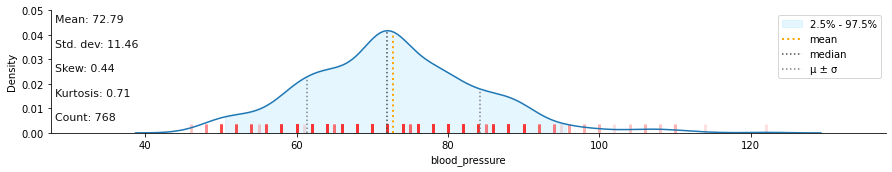

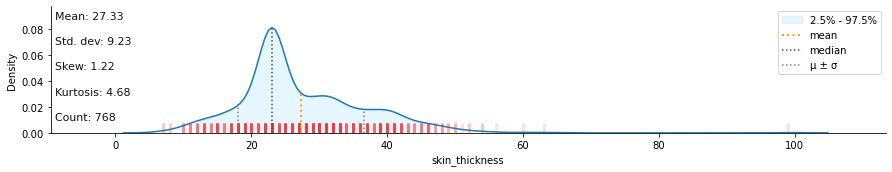

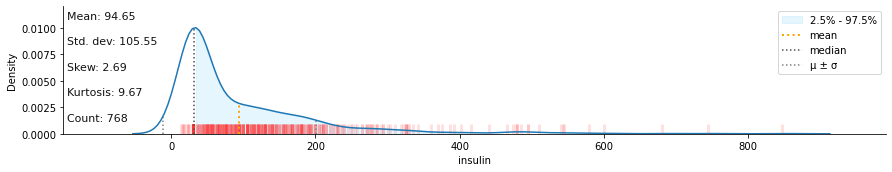

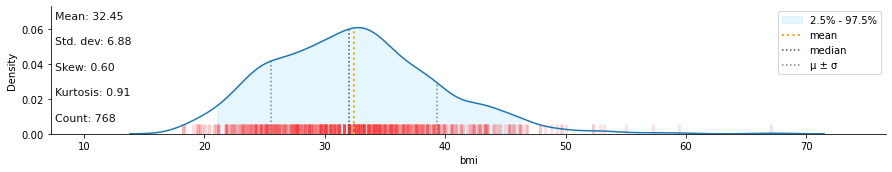

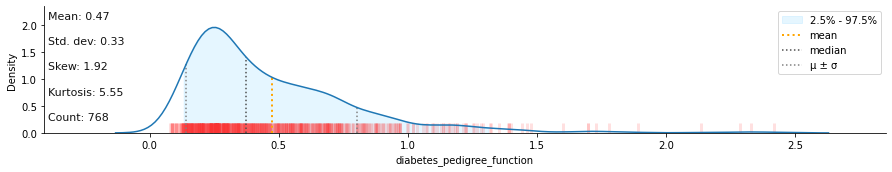

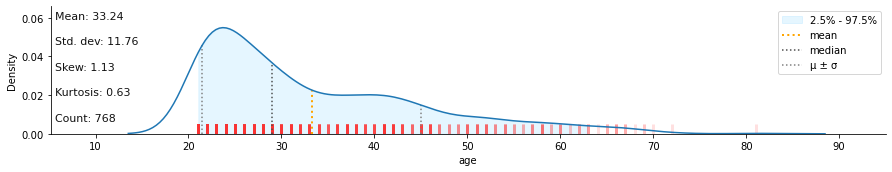

In [29]:
klib.dist_plot(df) # returns a distribution plot for every numeric feature

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

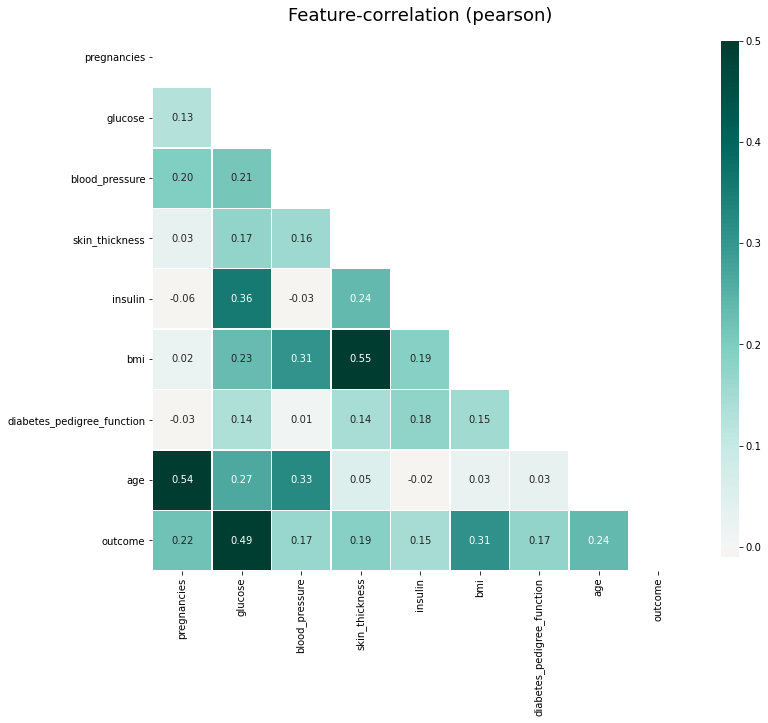

In [30]:
klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int8   
 1   glucose                     768 non-null    int16  
 2   blood_pressure              768 non-null    int8   
 3   skin_thickness              768 non-null    int8   
 4   insulin                     768 non-null    float64
 5   bmi                         768 non-null    float32
 6   diabetes_pedigree_function  768 non-null    float32
 7   age                         768 non-null    int8   
 8   outcome                     768 non-null    int8   
dtypes: float32(2), float64(1), int16(1), int8(5)
memory usage: 17.4 KB


In [32]:
df.to_excel(r'C:/Users/niket/Internships and Projects/Simpli learn/Data Science Capstone Healthcare/health care diabetes_Cleaned.xlsx', index = False)

## Project Task: Week 2
### Data Exploration:

1. Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

2. Create scatter charts between the pair of variables to understand the relationships. Describe your findings.

3. Perform correlation analysis. Visually explore it using a heat map.

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='outcome', ylabel='count'>

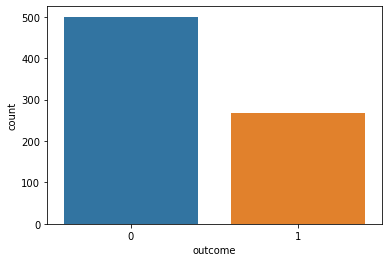

In [33]:
sns.countplot(x="outcome", data=df)

hence, here data can be considered as balanced because there is approx ratio of 70:30

<IPython.core.display.Javascript object>

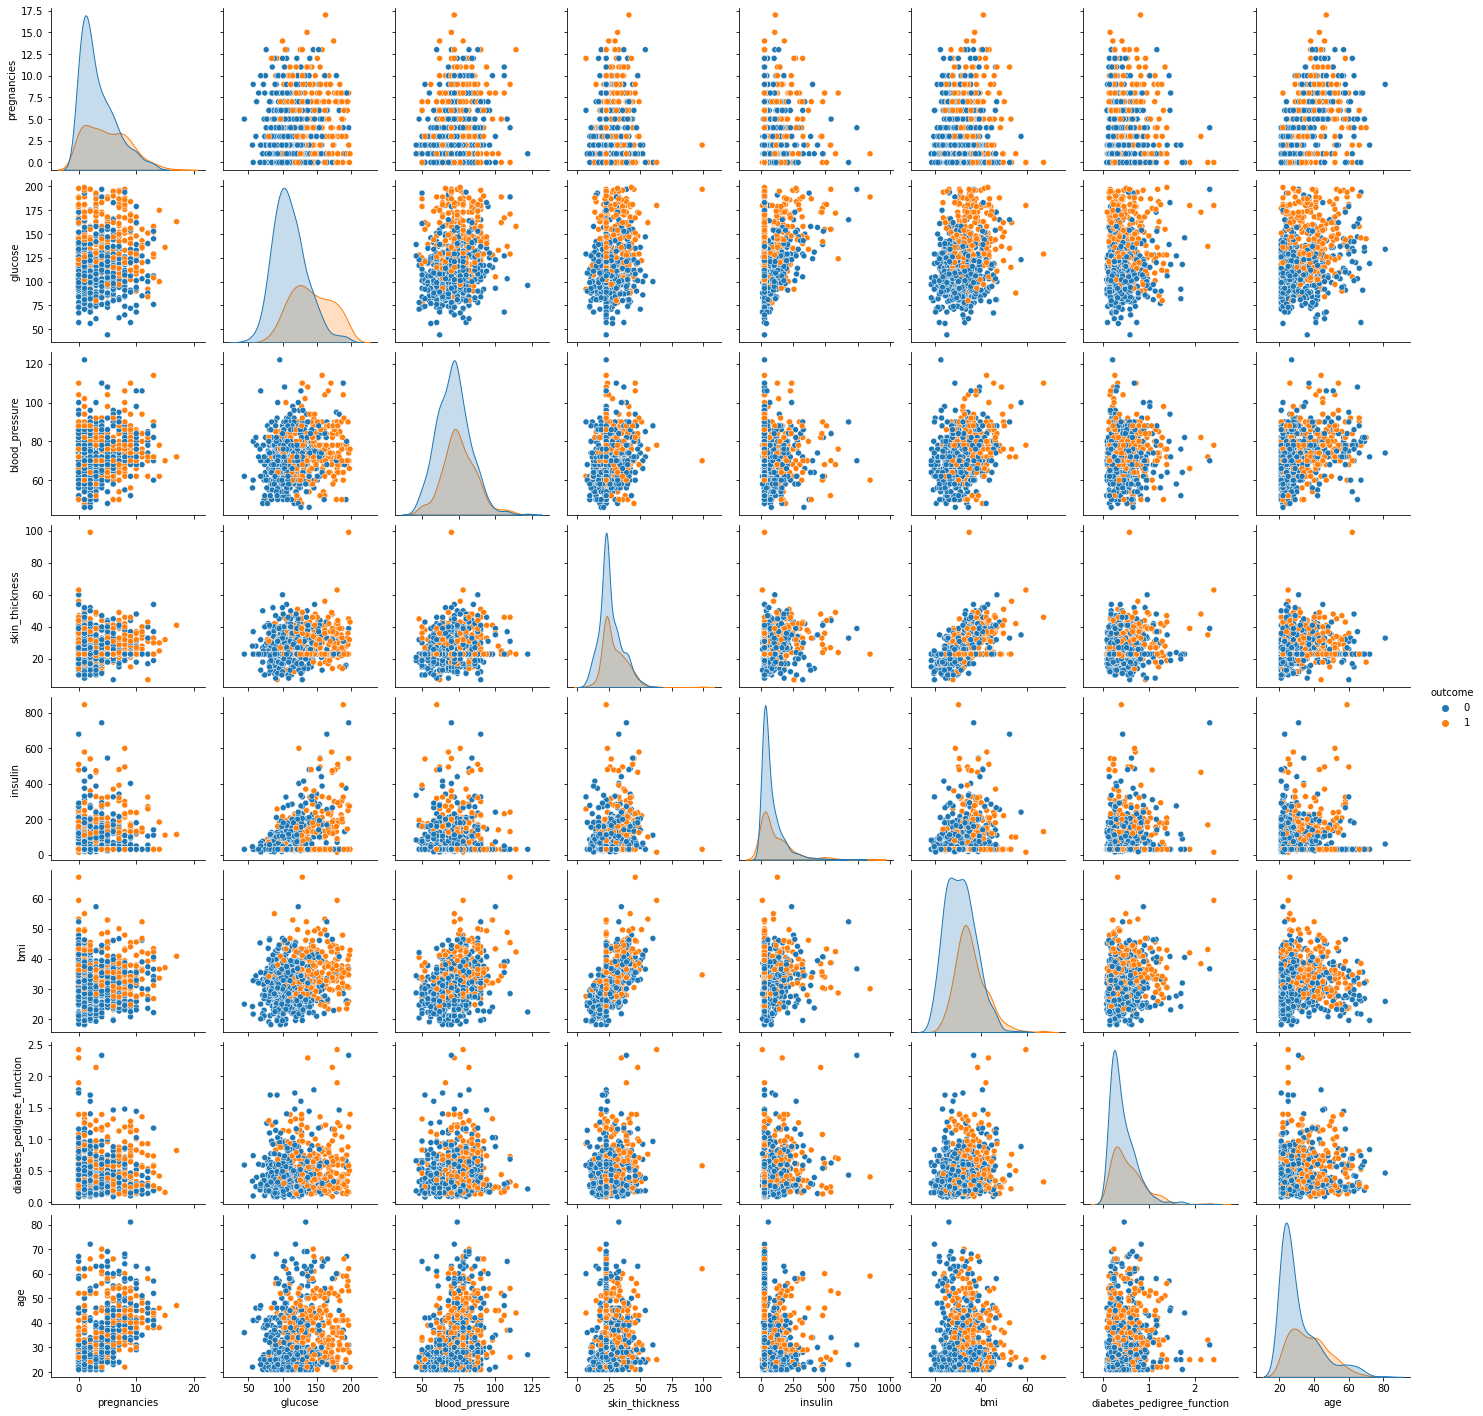

In [34]:
sns.pairplot(df, hue='outcome')

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

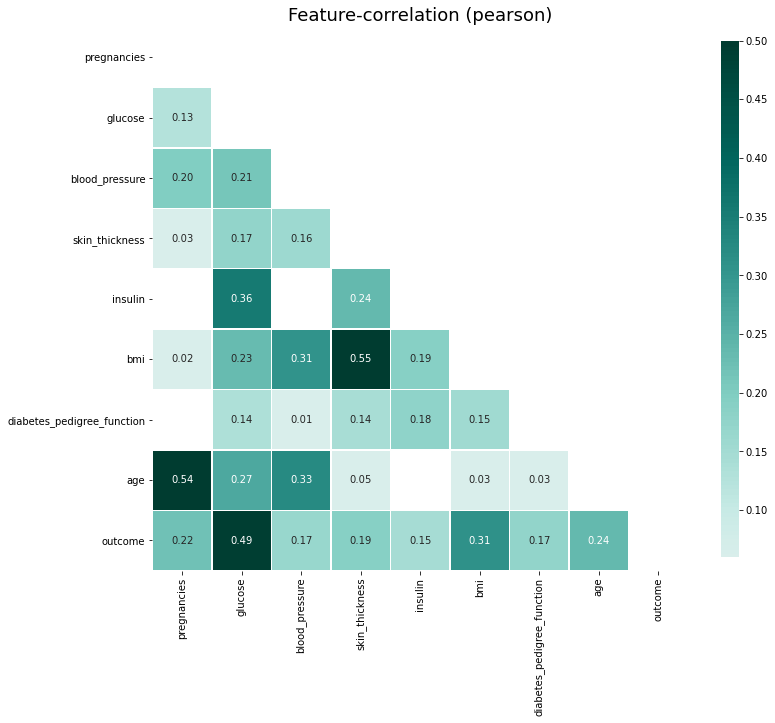

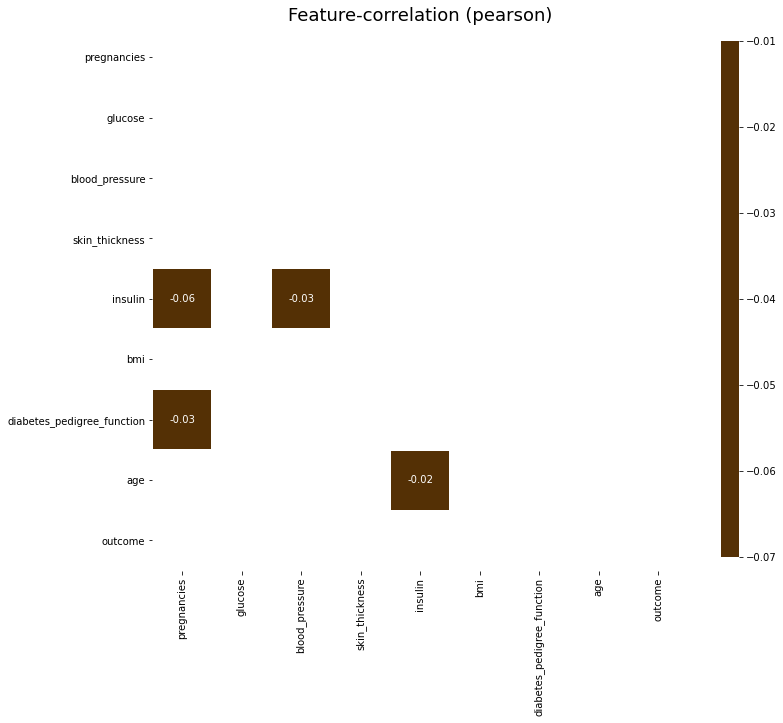

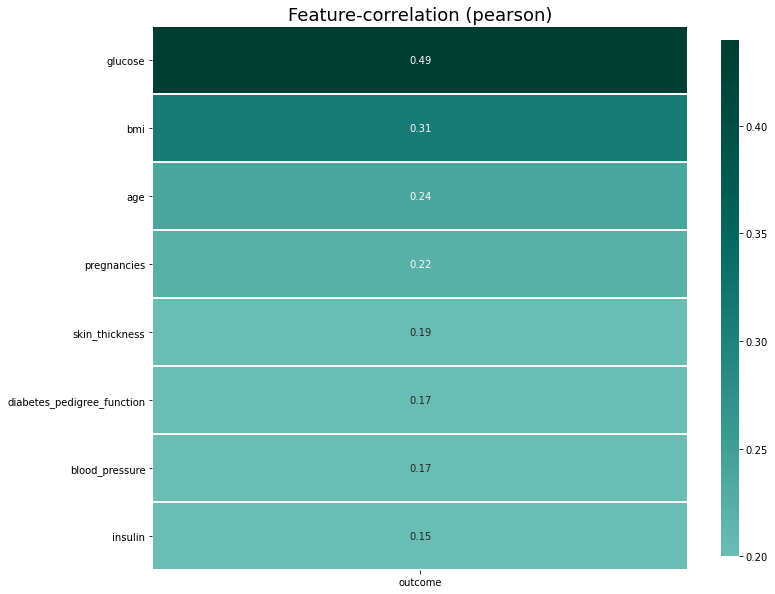

In [35]:
klib.corr_plot(df, split='pos')
klib.corr_plot(df, split='neg') 
klib.corr_plot(df, target='outcome')

## Project Task: Week 3
### Data Modeling:

1. Devise strategies for model building. It is important to decide the right validation framework. Express your thought process.

2. Apply an appropriate classification algorithm to build a model. Compare various models with the results from KNN algorithm.

 

this is a classification problem hence below ML algorithms can be used-
RF, DT, Loglistic regression, K-NN, SVM, Nive Bayes

SVM is ruled out because There is no clear distingusing classification between features.
DT and Random forest can lead to over fitting because of small Dataset but will try to get scores and accuracy of models
Naive bayes cannot be done because features are not category but numeric.


we will moove forward with Knn, Logistic regression, DT, RF

## Project Task: Week 4

### Data Modeling:

1. Create a classification report by analyzing sensitivity, specificity, AUC (ROC curve), etc. Please be descriptive to explain what values of these parameter you have used.

In [36]:
x = df.iloc[:,[1,2,4,5,6,7]]
y = df.iloc[:,8]

In [37]:
x.head()

,glucose,blood_pressure,insulin,bmi,diabetes_pedigree_function,age
0,148,72,30.5,33.599998,0.627,50
1,85,66,30.5,26.600000,0.351,31
2,183,64,30.5,23.299999,0.672,32
3,89,66,94.0,28.100000,0.167,21
4,137,72,168.0,43.099998,2.288,33


In [38]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: outcome, dtype: int8

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state =100)

<IPython.core.display.Javascript object>

In [40]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train) 

LogisticRegression()

In [41]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8013029315960912
0.7207792207792207


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y,model.predict(x))
cm

array([[442,  58],
       [107, 161]], dtype=int64)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       500
           1       0.74      0.60      0.66       268

    accuracy                           0.79       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.79      0.78       768



AUC: 0.839


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

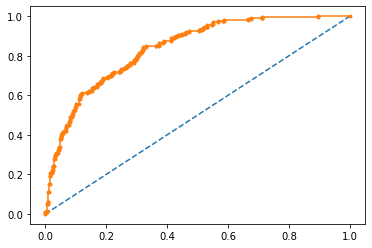

In [44]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = model.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')


Here we are trying to increase TPR here and FPR can be compromised.
FPR at 0.6 and TPR at approx 0.95 can be the best fit for the model

f1=0.661 auc=0.713 ap=0.715


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

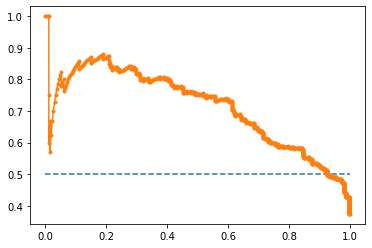

In [45]:
#Precision Recall Curve for Logistic Regression

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = model.predict_proba(x)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = model.predict(x)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probs)
# calculate F1 score
f1 = f1_score(y, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [46]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

<IPython.core.display.Javascript object>

RandomForestClassifier(max_features=6)

In [47]:
#Applying K-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x)
scaled_features = scaler.transform(x)
df_feat = pd.DataFrame(scaled_features, columns = x.columns)
df_feat.head()

<IPython.core.display.Javascript object>

,glucose,blood_pressure,insulin,bmi,diabetes_pedigree_function,age
0,0.670968,0.342105,0.019832,0.314928,0.234415,0.483333
1,0.264516,0.263158,0.019832,0.171779,0.116567,0.166667
2,0.896774,0.236842,0.019832,0.104294,0.253629,0.183333
3,0.290323,0.263158,0.096154,0.202454,0.038002,0.000000
4,0.600000,0.342105,0.185096,0.509202,0.943638,0.200000


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['outcome'], test_size = 0.20)

# We'll start with k = 1.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 13) #here k = 13 because of low error rate in below graph

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Predictions and Evaluations
# Let's evaluate our KNN model !
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, pred))

print(classification_report(y_test, pred))

[[84 19]
 [27 24]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       103
           1       0.56      0.47      0.51        51

    accuracy                           0.70       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.69      0.70      0.69       154



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Error Rate')

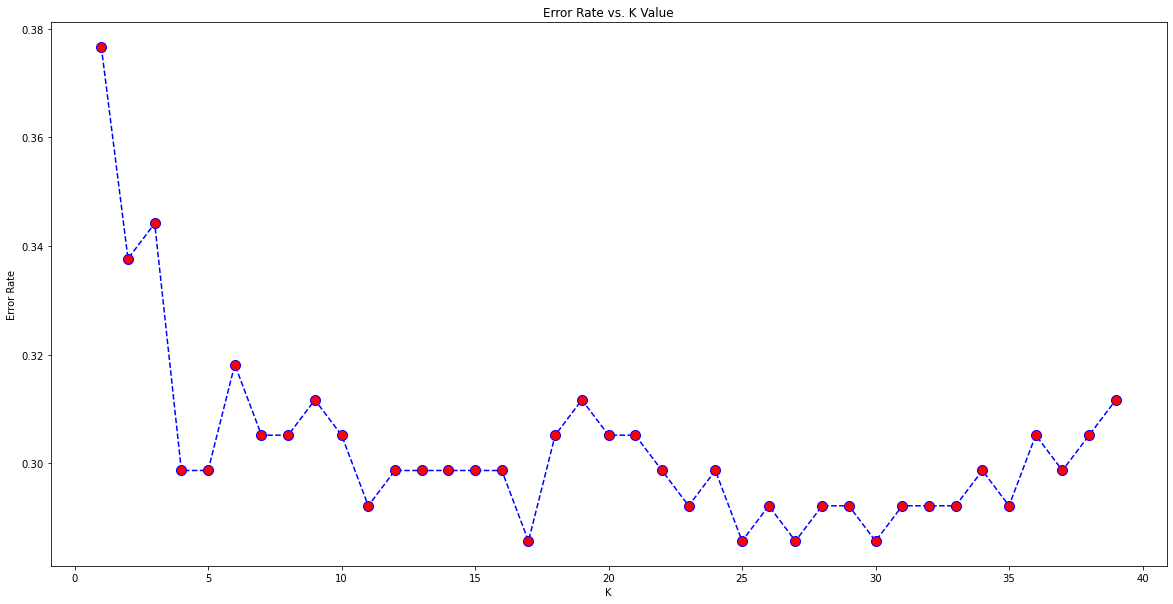

In [50]:
error_rate = []
  
# Will take some time
for i in range(1, 40):
      
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
  
plt.figure(figsize =(20, 10))
plt.plot(range(1, 40), error_rate, color ='blue',
                linestyle ='dashed', marker ='o',
         markerfacecolor ='red', markersize = 10)
  
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

AUC: 0.851
True Positive Rate - [0.         0.00746269 0.01865672 0.03358209 0.05223881 0.0858209
 0.11567164 0.13059701 0.17910448 0.20895522 0.27238806 0.31343284
 0.36567164 0.39925373 0.45522388 0.48507463 0.51865672 0.56343284
 0.5858209  0.61567164 0.63432836 0.6641791  0.69402985 0.7238806
 0.76119403 0.80597015 0.85447761 0.87686567 0.88432836 0.91791045
 0.94402985 0.95522388 0.96641791 0.97761194 0.98134328 0.99626866
 1.         1.        ], False Positive Rate - [0.    0.    0.    0.002 0.006 0.008 0.01  0.014 0.018 0.024 0.028 0.028
 0.034 0.044 0.048 0.052 0.074 0.084 0.104 0.116 0.128 0.154 0.172 0.202
 0.254 0.288 0.326 0.364 0.408 0.456 0.492 0.552 0.594 0.65  0.7   0.836
 0.936 1.   ] Thresholds - [1.94871795 0.94871795 0.92307692 0.8974359  0.87179487 0.84615385
 0.82051282 0.79487179 0.76923077 0.74358974 0.71794872 0.69230769
 0.66666667 0.64102564 0.61538462 0.58974359 0.56410256 0.53846154
 0.51282051 0.48717949 0.46153846 0.43589744 0.41025641 0.38461538
 0.3589

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'True Positive Rate')

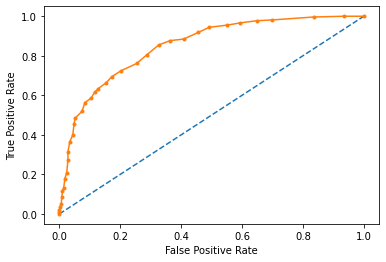

In [51]:
#Preparing ROC Curve (Receiver Operating Characteristics Curve)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# predict probabilities
probs = knn.predict_proba(scaled_features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y, probs)
print("True Positive Rate - {}, False Positive Rate - {} Thresholds - {}".format(tpr,fpr,thresholds))
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


f1=0.658 auc=0.743 ap=0.737


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

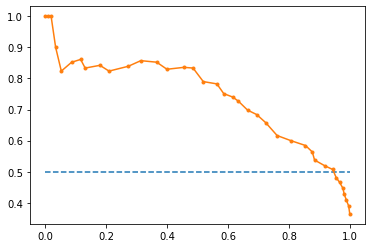

In [52]:
#Precision Recall Curve for KNN

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
# predict probabilities
probs = knn.predict_proba(scaled_features)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# predict class values
yhat = knn.predict(scaled_features)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y, probs)
# calculate F1 score
f1 = f1_score(y, yhat)
# calculate precision-recall AUC
auc = auc(recall, precision)
# calculate average precision score
ap = average_precision_score(y, probs)
print('f1=%.3f auc=%.3f ap=%.3f' % (f1, auc, ap))
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the precision-recall curve for the model
plt.plot(recall, precision, marker='.')

In [53]:
#Applying Decission Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(max_depth=6)
model3.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [54]:
model3.score(X_train,y_train)

0.8908794788273615

In [55]:
model3.score(X_test,y_test)

0.6623376623376623

In [56]:
#Applying Random Forest
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier(n_estimators=11)
model4.fit(X_train,y_train)

RandomForestClassifier(n_estimators=11)

In [57]:
model4.score(X_train,y_train)

0.99185667752443

In [58]:
model4.score(X_test,y_test)

0.7077922077922078

In [59]:
#Support Vector Classifier

from sklearn.svm import SVC 
model5 = SVC(kernel='rbf',
           gamma='auto')
model5.fit(X_train,y_train)

SVC(gamma='auto')

In [60]:
model5.score(X_train,y_train)

0.7866449511400652

In [61]:
model5.score(X_test,y_test)

0.6883116883116883

As predicted, Random Forest, Decesion Trees, SVM model cannot be used because of over fitting